In [1]:
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Cleaned_Data.csv')

In [3]:
#select one hospital
Charleville_hosp = df[['Month', 'Charleville Hospital']]
Charleville_hosp 

,Month,Charleville Hospital
0,2015-07-01,514.0
1,2015-08-01,603.0
2,2015-09-01,555.0
3,2015-10-01,446.0
4,2015-11-01,472.0
5,2015-12-01,383.0
6,2016-01-01,476.0
7,2016-02-01,619.0
8,2016-03-01,492.0
9,2016-04-01,534.0


In [5]:
#indexing

Charleville_hosp_sorted= Charleville_hosp.sort_values('Month')
Charleville_hosp_sorted = Charleville_hosp.groupby('Month')['Charleville Hospital'].sum().reset_index()
Charleville_hosp_sorted = Charleville_hosp.set_index('Month')
Charleville_hosp_sorted.index
train=Charleville_hosp_sorted[0:31] 
test=Charleville_hosp_sorted[30:]
test_long =Charleville_hosp_sorted[2:]
test

,Charleville Hospital
Month,
2018-01-01,611.0
2018-02-01,446.0
2018-03-01,404.0
2018-04-01,416.0
2018-05-01,425.0
2018-06-01,397.0


**First: PACF and ACF**


In [7]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf

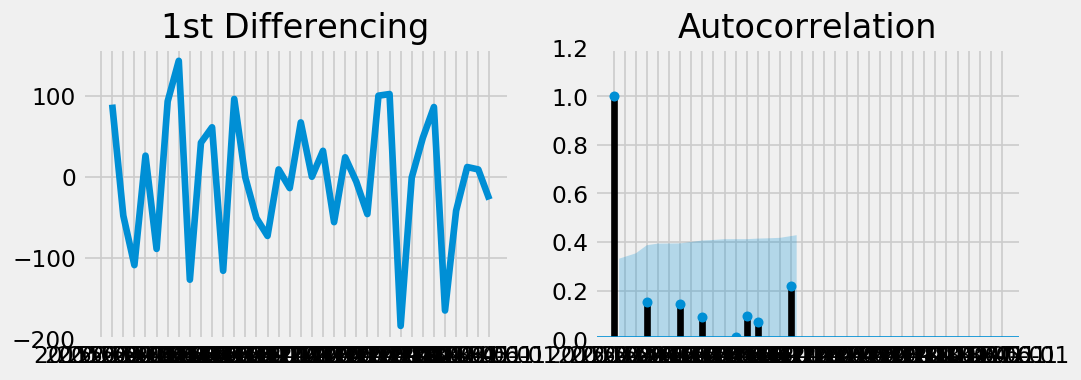

In [9]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(Charleville_hosp_sorted.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(Charleville_hosp_sorted.diff().dropna(), ax=axes[1])

plt.show()

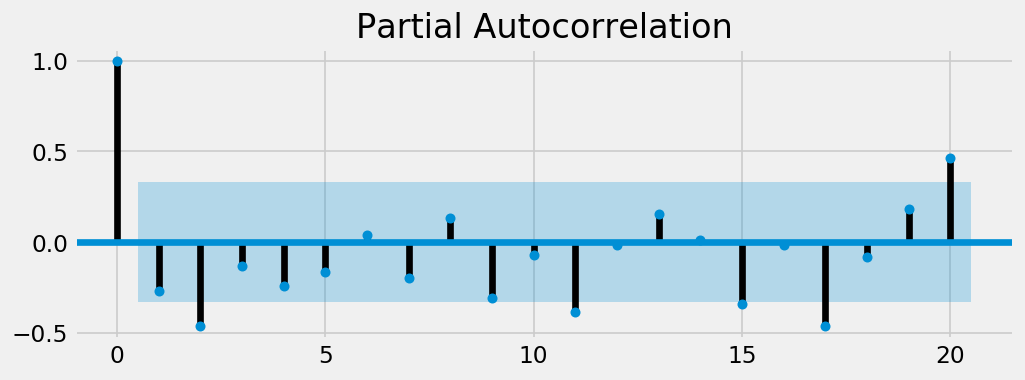

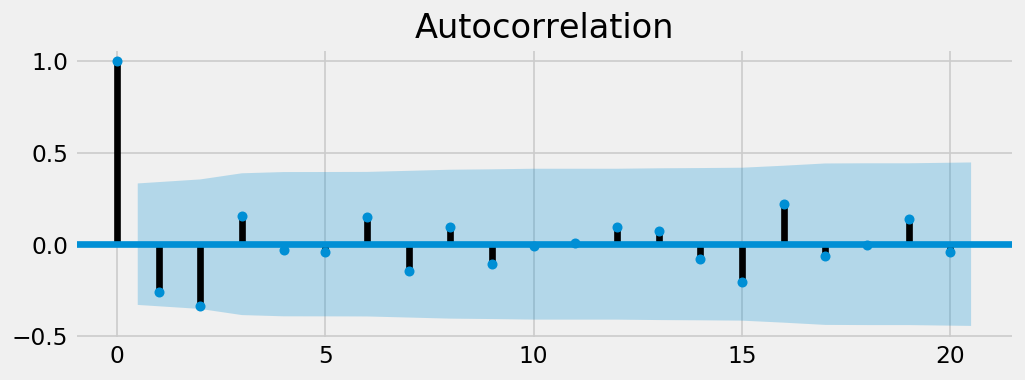

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# fig, axes = plt.subplots(1, 2, sharex=True)
# axes[0].plot(Charleville_hosp_sorted.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
# plot_pacf(Charleville_hosp_sorted.diff().dropna(), ax=axes[1])
plot_pacf(Charleville_hosp_sorted.diff().dropna(), lags=20)
plot_acf(Charleville_hosp_sorted.diff().dropna(),lags=20)
plt.show()

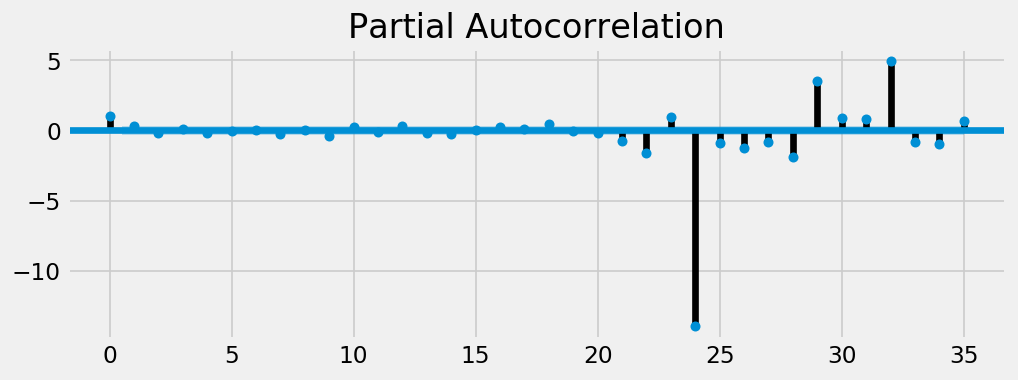

In [11]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
# series = read_csv(', header=0, index_col=0)
plot_pacf(Charleville_hosp_sorted, lags=50)
pyplot.show()

**Second: Grid Search**

In [12]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [14]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:462.507114596859
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:271.4653722566426
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:96.23985944096076
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:204.52319735796337
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:72.98331834620481
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:71.10585519658092
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:217.5393657056247
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:208.28845905234465
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:72.65936852913546
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:85.89841007034335
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:74.58852495519855
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:86.61446546130466
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:88.614687930233

ARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:209.64028499744649
ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:200.28306559479293
ARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC:59.02395158639099
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:67.1596001641852
ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:57.240032767305856
ARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 2, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:68.56824811837541
ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:70.56824830957696
ARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:60.825625968920136
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 1, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 0)x(2, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(2, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:318.58123476302666
ARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:178.2725911

ARIMA(1, 1, 0)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:67.12214191692782
ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:69.12214190395684
ARIMA(1, 1, 0)x(2, 0, 2, 12)12 - AIC:71.1221419086289
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 0)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:319.8048944488712
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:183.30401100929242
ARIMA(1, 1, 1)x(0, 0, 2, 12)12 - AIC:56.50148048806706
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:188.69406389023266
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:44.88273129034892
ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(0, 2, 0, 12)12 - AIC:41.00160879740302
ARIMA(1, 1, 1)x(0, 2, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:193.93879075774458
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 

ARIMA(2, 0, 0)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:332.8236820816165
ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:193.3977224904809
ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:70.87936440130679
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:196.15985979074674
ARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:62.17280524970518
ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:64.7740764851566
ARIMA(2, 0, 1)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(2, 0, 1)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:193.5542191434433
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:193.83194383064776
ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:56.66317819525622
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:62.062791569073916
ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:63.57363237558422
ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 1)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:53.37110594402935
AR

ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:nan
ARIMA(2, 2, 1)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(2, 2, 1)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:177.41382230803978
ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:177.9125523798393
ARIMA(2, 2, 1)x(1, 0, 2, 12)12 - AIC:10.738372700728691
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:4.763827002149018
ARIMA(2, 2, 1)x(1, 1, 1, 12)12 - AIC:31.247960396072312
ARIMA(2, 2, 1)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 2, 1)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:20.20773454231645
ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:10.87212653773397
ARIMA(2, 2, 1)x(2, 0, 2, 12)12 - AIC:5.854686802640636
ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(2, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 1)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 

In [ ]:
import itertools
#set parameter range
p = range(0,3)
q = range(0,3)
d = range(0,2)
s = range(12,13)
# list of all parameter combos
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(p, d, q, s))
# SARIMA model pipeline
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                    order=param,
                                    seasonal_order=param_seasonal)
            results = mod.fit(max_iter = 50, method = 'powell')
            print('SARIMA{},{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue